# Introduction - HR ANALYTICS 

Source: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

Our client is a large MultiNational Corporation and they have 9 broad verticals across the organisation. One of the problem our client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1. They first identify a set of employees based on recommendations/ past performance
2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

<img width=75% height=75% src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/wns_hack_im_1.jpg"/>

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.


**Evaluation Metric** <br>
The evaluation metric for this competition is F1 Score.


**Dataset Description**
<table align="left" border="1" cellspacing="10" cellpadding="10"><colgroup> <col width="171" /> <col width="161" /></colgroup>
<tbody align="left">
<tr>
<td><strong>Variable</strong></td>
<td width=500><strong>Definition</strong></td>
</tr>
<tr>
<td>employee_id</td>
<td >Unique ID for employee</td>
</tr>
<tr>
<td>department</td>
<td >Department of employee</td>
</tr>
<tr>
<td>region</td>
<td >Region of employment (unordered)</td>
</tr>
<tr>
<td>education</td>
<td >Education Level</td>
</tr>
<tr>
<td>gender</td>
<td >Gender of Employee</td>
</tr>
<tr>
<td>recruitment_channel</td>
<td >Channel of recruitment for employee</td>
</tr>
<tr>
<td>no_of_trainings</td>
<td >no of other trainings completed in previous year on soft skills, technical skills etc.</td>
</tr>
<tr>
<td>age</td>
<td >Age of Employee</td>
</tr>
<tr>
<td>previous_year_rating</td>
<td >Employee Rating for the previous year</td>
</tr>
<tr>
<td>length_of_service</td>
<td >Length of service in years</td>
</tr>
<tr>
<td>KPIs_met &gt;80%</td>
<td >if Percent of KPIs(Key performance Indicators) &gt;80% then 1 else 0</td>
</tr>
<tr>
<td>awards_won?</td>
<td >if awards won during previous year then 1 else 0</td>
</tr>
<tr>
<td>avg_training_score</td>
<td >Average score in current training evaluations</td>
</tr>
<tr>
<td>is_promoted</td>
<td >(Target) Recommended for promotion</td>
</tr>
</tbody>
</table>


# Problem Statement:
To assist the company in expediting the promotion cycle by building a model that will be able to identify eligible candidates for promotion. <br>
This is a binary classification problem.


## Hypothesis Generation - Factors that can influence the outcome of this prediction

Below are some of the factors which I think can influence the "promotability" of an employee: 

* Education Level: Educational qualifications are usually a factor in employee promotion. I expect that employees with higher qualifications (Bachelor's and Masters & Above) should have more chances of promotion
* Previous Year Rating: Employees that have higher ratings (say 4.0 and 5.0) should have more chances of promotion compared to those with 1.0 to 3.0
* KPIs_met > 80%: Employees that have met above 80% of their Key Performance Indicators should have more chances of promotion
* Awards_won: Those that have won awards are considered high performers and therefore should have an edge for promotion considerations
* Average Training Score: Those whose overall average in current training evaluations are high are expected to have higher chances of getting promoted than those with lower averages

We'll see the effect of some of these factors subsequently


## Getting system ready and Loading the data

### Library Imports 

In [3]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

# Exploratory Analysis

We read the train and test datasets supplied by the client and explore the datasets. 
We'll see the shape and a few rows of data to have a look and feel of it. 
Also important is to find out the data types of the fields provided.

In [4]:
#Import the train and test data sets
train = pd.read_csv('train_LZdllcl.csv')
test = pd.read_csv('test_2umaH9m.csv')

Let's keep a copy of the train and test datasets before we make any modifications

In [5]:
train_original=train.copy() 
test_original=test.copy()

In [6]:
train.shape, test.shape

((54808, 14), (23490, 13))

Train set has one column more than the test dataset. Obviously, the test dataset doesn't have the target variable as we'll be using it to test the model trained using the train dataset.

Out of curiousity, let's find out the percentage split of the train and test sets? 

In [7]:
trainTotal = train.shape[0]
testTotal = test.shape[0]
trainPercent = trainTotal / (trainTotal + testTotal)
testPercent = testTotal / (trainTotal + testTotal)
msg1 = "%s: %f%%" % ("Train Percentage: ", trainPercent*100.0)
print(msg1)
msg2 = "%s: %f%%" % ("Test Percentage: ", testPercent*100.0)
print(msg2)

Train Percentage: : 69.999234%
Test Percentage: : 30.000766%


The dataset has been split into two as follows:

* 70% for Train file which will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
* 30% for Test file which contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.


### Understanding the data

In [8]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

As stated earlier, train set is one column more than test set. Test set doesn't include the target variable which we'll predict after training our model with the train set.<br>

The above also shows that we have 9 numerical features and 5 categorical features

Let's see some data rows:

In [10]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Lets describe the numerical features

In [12]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Quick inferences from the above **train.describe()** output

* Not many employees have done more than one training as the mean is quite small, max = 10.
* Most employees are youths as mean age is about 35years, max age is 60
* Since most employees are young, it is not surprising that the mean length_of_service is about 6yrs, max = 37years

Further analysis may prove these inferences to be true with skewed distribution for these variables

In [13]:
#Lets describe the categorical features
train.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Some inferences from the above: 

* There are 9 unique departments, 34 regions, 3 educational qualification groupings and 3 different recruitment channels
* Education variable has missing values as it's total data count (52399) is less than the total number of rows (54808).
* Sales & Marketing has the highest number of employees
* Most employees are in region_2 and most employees have Barchelor's degree
* There are more men employees than women

### Univariate Analysis

Here we examine each variable individually.

Histogram and density plots allows us to see the distribution of numeric features while seaborn's countplot function gives the distribution of categorical features

### Numerical Plots

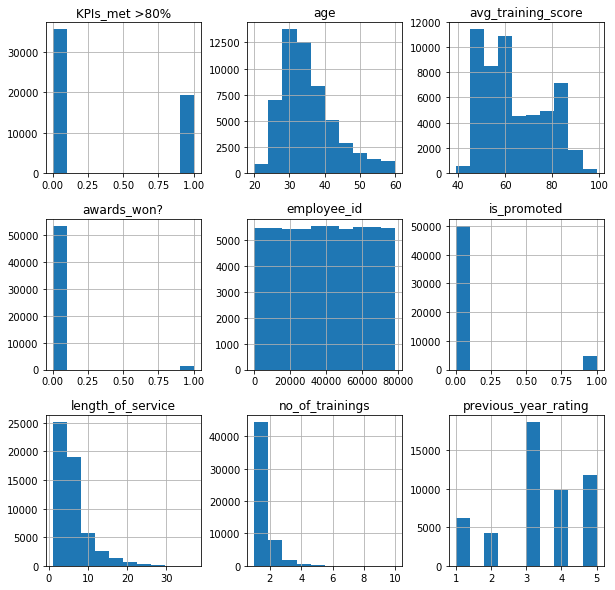

In [14]:
train.hist(figsize=(10,10))
plt.show()

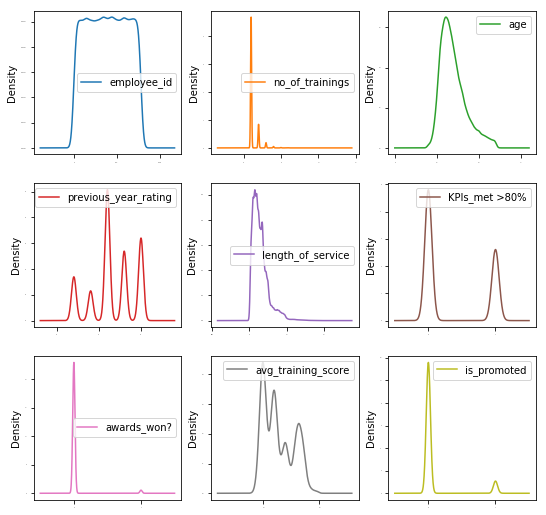

In [15]:
# density
train.plot(kind='density', subplots=True, figsize=(9,9), layout=(3,3), sharex=False, legend=True, fontsize=1)
plt.show()

The length_of_service, age, no_of_trainings and awards_won? features seem to be skewed to the right. They have some outliers. These are good candidates for normalization (standardization). Let's see the box plots of these suspects

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


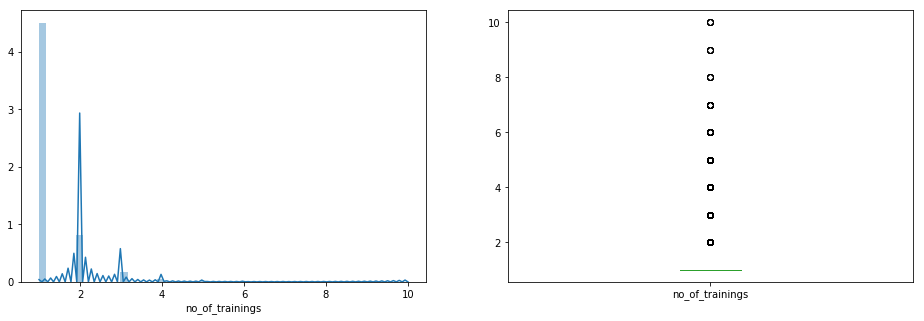

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['no_of_trainings']); 
plt.subplot(122) 
train['no_of_trainings'].plot.box(figsize=(16,5)) 
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


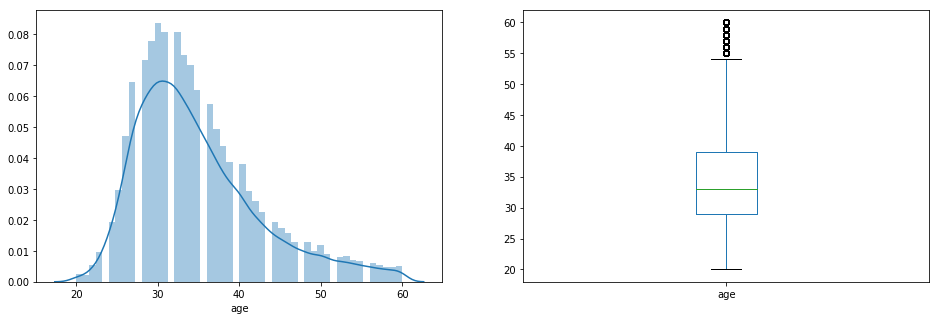

In [17]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['age']); 
plt.subplot(122) 
train['age'].plot.box(figsize=(16,5)) 
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


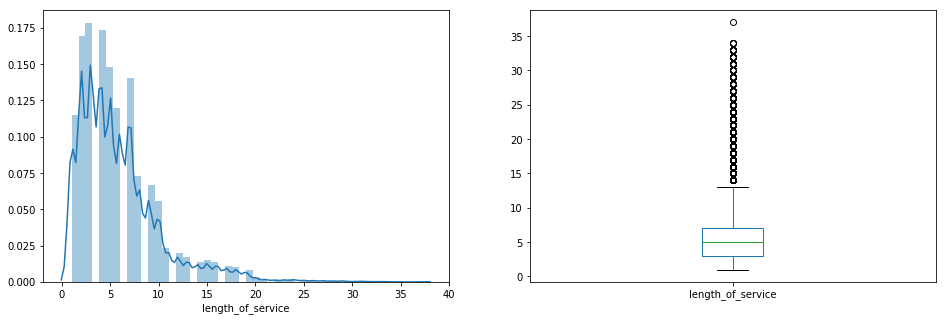

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['length_of_service']); 
plt.subplot(122) 
train['length_of_service'].plot.box(figsize=(16,5)) 
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


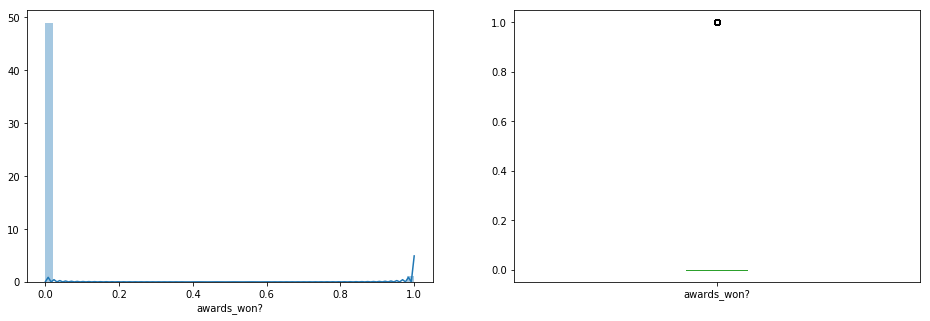

In [19]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['awards_won?']); 
plt.subplot(122) 
train['awards_won?'].plot.box(figsize=(16,5)) 
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


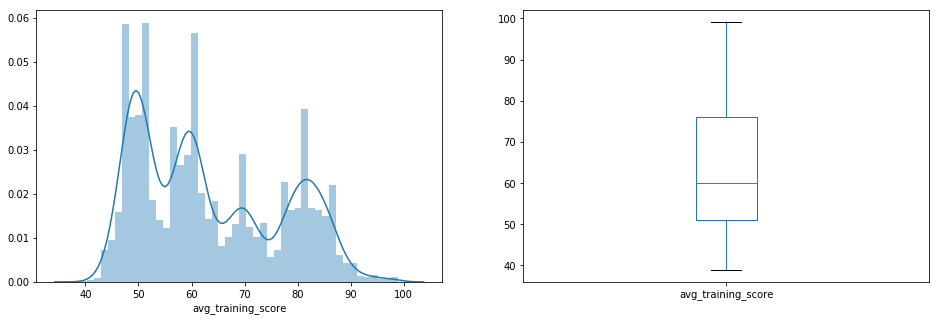

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['avg_training_score']); 
plt.subplot(122) 
train['avg_training_score'].plot.box(figsize=(16,5)) 
plt.show()

### Categorical plots

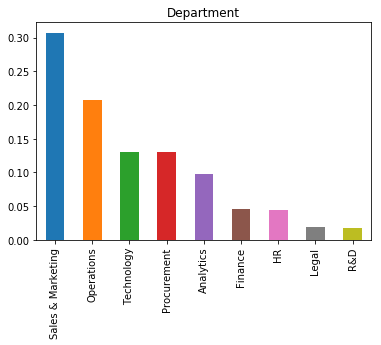

In [21]:
train['department'].value_counts(normalize=True).plot.bar(title= 'Department') 
plt.show()

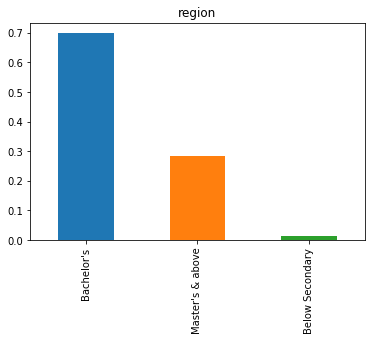

In [23]:
train['education'].value_counts(normalize=True).plot.bar(title= 'region') 
plt.show()

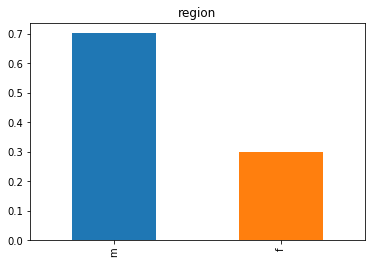

In [25]:
train['gender'].value_counts(normalize=True).plot.bar(title= 'region') 
plt.show()

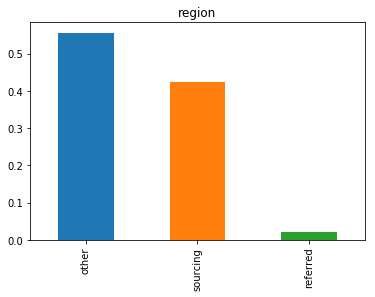

In [26]:
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title= 'region') 
plt.show()

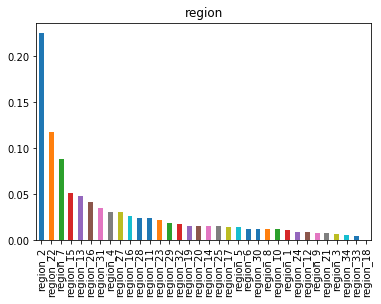

In [27]:
train['region'].value_counts(normalize=True).plot.bar(title= 'region') 
plt.show()

* 70% of the work force are **males**, with 30% **females**<br>
* Most of the employees population (about 30%) work in **Sales & Marketing**<br>
* About 70% of employees have a **Barchelor's** degree while the remaining 30% have **Below Secondary** and **Master's & above** qualifications<br>
* About 25% of employees work in **region_2** <br>
* 55% of staff were recruited from other recruitment channels apart from **direct** sourcing and **referals**.

### Bivariate Analysis
Here we check how some variables compare with the target variable

This will be a good place to test some of the hypotheses we generated in the beginning. Here they are:
* Education Level: Educational qualifications are usually a factor in employee promotion. I expect that employees with higher qualifications (Bachelor's and Masters & Above) should have more chances of promotion
* Previous Year Rating: Employees that have higher ratings (say 4.0 and 5.0) should have more chances of promotion compared to those with 1.0 to 3.0
* KPIs_met > 80%: Employees that have met above 80% of their Key Performance Indicators should have more chances of promotion
* Awards_won: Those that have won awards are considered high performers and therefore should have an edge for promotion considerations

We start with **Categorical Independent Variable vs. Target Variable**
### Categorical Independent Variable vs Target Variable

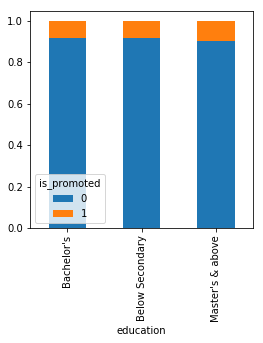

In [28]:
education=pd.crosstab(train['education'],train['is_promoted']) 
education.div(education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

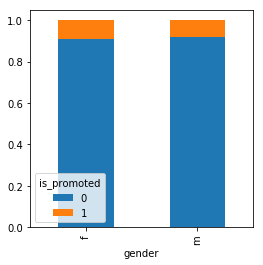

In [29]:
gender=pd.crosstab(train['gender'],train['is_promoted']) 
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

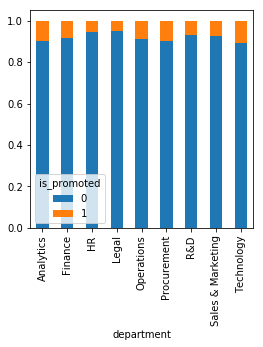

In [30]:
department=pd.crosstab(train['department'],train['is_promoted']) 
department.div(department.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

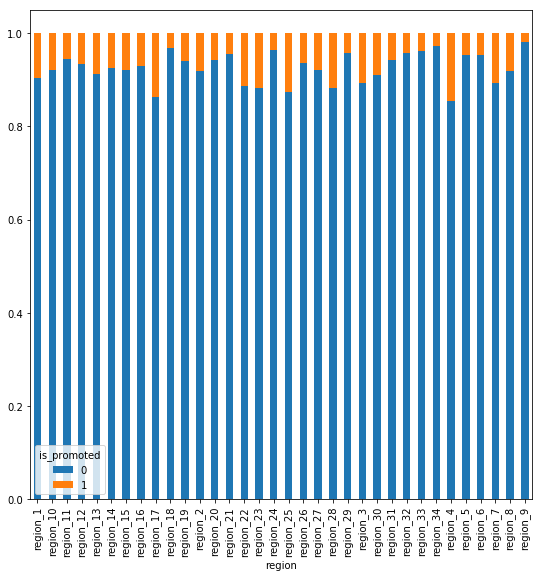

In [31]:
region=pd.crosstab(train['region'],train['is_promoted']) 
region.div(region.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,9))
plt.show()

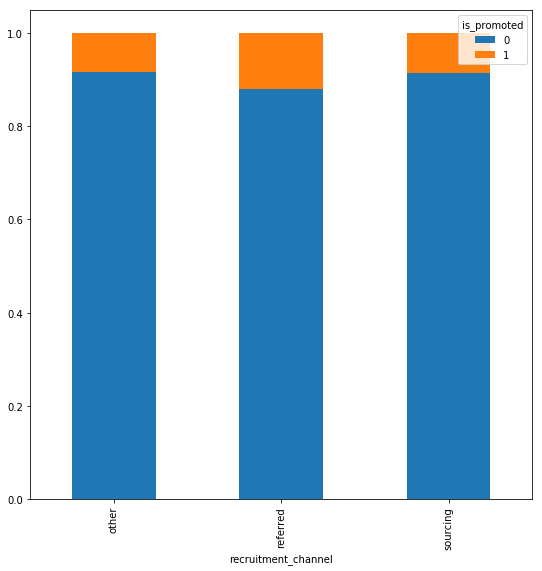

In [32]:
rec=pd.crosstab(train['recruitment_channel'],train['is_promoted']) 
rec.div(rec.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,9))
plt.show()

From the above plots, it is clear that non of the categorical independent features have any significant influence on who gets promoted. Only **region** and **recruitment channel** differed a little bit between different classes but mostly no significantly obvious trend that suggests that promotion is dependent on any of the categorical features<br>

Next, we look at **Numerical Independent Variables vs Target Variables**

### Numerical Independent Variables vs Target Variables

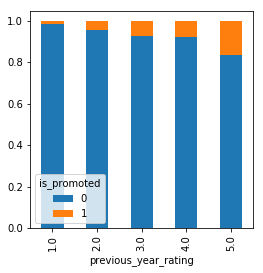

In [33]:
pyr=pd.crosstab(train['previous_year_rating'],train['is_promoted']) 
pyr.div(pyr.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

As expected, more employees with higher **previous_year_rating** are promoted as compared with those with lower ratings as observed above.

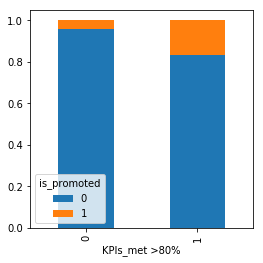

In [34]:
kpi=pd.crosstab(train['KPIs_met >80%'],train['is_promoted']) 
kpi.div(kpi.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Similarly, more employees that met above 80% of their KPIs had promotion preference than those that didn't from the above chart

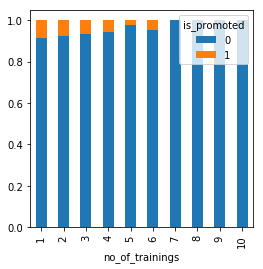

In [35]:
kpi=pd.crosstab(train['no_of_trainings'],train['is_promoted']) 
kpi.div(kpi.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

The above chart is quite interesting. Employees with lesser **no_of_trainings** have better chance of getting promotion over their counterparts with high no_of_trainings. The only explanation for this can be that they are high performers and highly skilled already requiring little or no training. Employees trained the most (7 to 10 trainings) were not promoted at all

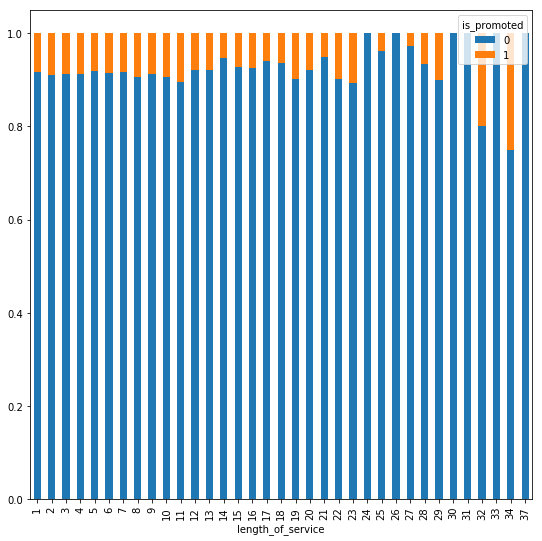

In [36]:
los=pd.crosstab(train['length_of_service'],train['is_promoted']) 
los.div(los.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,9))
plt.show()

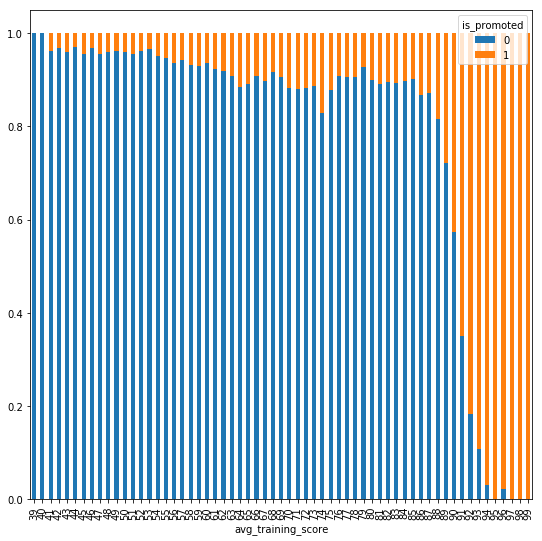

In [37]:
ats=pd.crosstab(train['avg_training_score'],train['is_promoted']) 
ats.div(ats.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,9))
plt.show()

Similar to performance on the job, performance on training influences promotion a great deal. A high average training score of 90 and above increases chance of promotion significantly with a 100% chance for scoring 95 and above.<br>

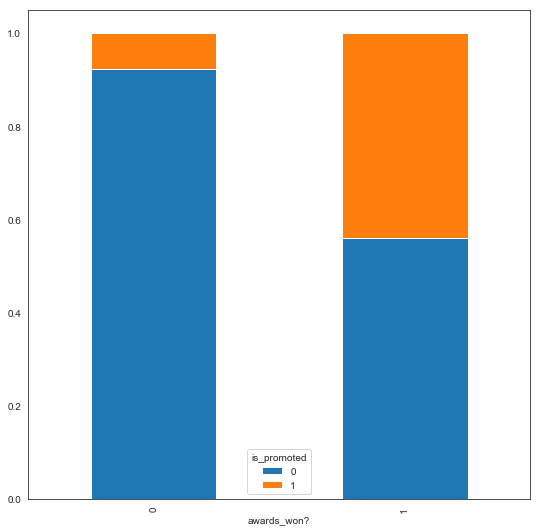

In [67]:
ats=pd.crosstab(train['awards_won?'],train['is_promoted']) 
ats.div(ats.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,9))
plt.show()

### Correlations

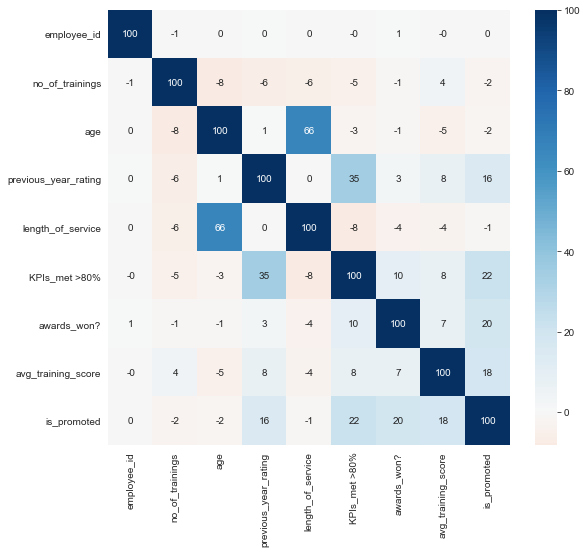

In [38]:
sns.set_style("white")
correlations = train.corr(method='pearson')
mask = np.zeros_like(correlations, dtype=np.bool)
plt.figure(figsize=(9,8))
sns.heatmap(correlations*100, annot=True, fmt='.0f', cmap="RdBu", center=0, mask=mask)
plt.show()

Strongest correlation is between length_of_service and age - 66% (this is expected - the older the staff, the higher the number of years put into work).<br>
Next in correlation strength is KPIs_met>80% and previous_year_rating - 35% (these are also expected as well - high performance rating is a consequence of meeting KPIs)<br>

Other notable correlations exist between the following variables:
* KPIs_met>80% and is_promoted (22%)
* awards_won? and is_promoted (20%)
* avg_training_score and is_promoted (18%)
* previous_year_rating and is_promoted (16%)

In feature engineering, we'll seek for any means of creating new features from the insights from **Numerical Independence Variable vs Target Variable** and **Correlations** and see their effect on training our model


# Data Cleaning

### 1. Remove duplicate records

In [39]:
#Before dropping duplicates
train.shape, test.shape

((54808, 14), (23490, 13))

In [40]:
#Dropping duplicates
train.drop_duplicates(), test.drop_duplicates()

(       employee_id         department     region         education gender  \
 0            65438  Sales & Marketing   region_7  Master's & above      f   
 1            65141         Operations  region_22        Bachelor's      m   
 2             7513  Sales & Marketing  region_19        Bachelor's      m   
 3             2542  Sales & Marketing  region_23        Bachelor's      m   
 4            48945         Technology  region_26        Bachelor's      m   
 5            58896          Analytics   region_2        Bachelor's      m   
 6            20379         Operations  region_20        Bachelor's      f   
 7            16290         Operations  region_34  Master's & above      m   
 8            73202          Analytics  region_20        Bachelor's      m   
 9            28911  Sales & Marketing   region_1  Master's & above      m   
 10           29934         Technology  region_23               NaN      m   
 11           49017  Sales & Marketing   region_7        Bachelo

In [41]:
#After dropping duplicates
train.shape, test.shape

((54808, 14), (23490, 13))

No duplicates exists as the shapes are the same, before and after duplicate drop function call

### 2. Missing Observations
* #### Missing Categorical Observations

In [45]:
train.select_dtypes(include=['object']).isnull().sum()

department                0
region                    0
education              2409
gender                    0
recruitment_channel       0
dtype: int64

There are 2409 employees with missing entries in educational qualification. We fill these with the word "Missing"

In [46]:
for column in train.select_dtypes(include=['object']):
    train[column] = train[column].fillna('Missing')

In [47]:
train.select_dtypes(include=['object']).isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

All missing **education** categorical fields have been filled with the word "Missing". We repeat the same with test dataset

In [48]:
test.select_dtypes(include=['object']).isnull().sum()

department                0
region                    0
education              1034
gender                    0
recruitment_channel       0
dtype: int64

In [49]:
for column in test.select_dtypes(include=['object']):
    test[column] = test[column].fillna('Missing')

In [50]:
test.select_dtypes(include=['object']).isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

Now, we have taken care of our missing categorical features. Next up, Missing Numerical Features

* #### Missing Numerical Observations

In [51]:
train.select_dtypes(exclude=['object']).isnull().sum()

employee_id                0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

There are 4124 employees with missing previous_year_rating. What are the values of previous_year_rating? Could it be that these employees have zero ratings and the zero ratings were left as NAN entries?

In [52]:
print(train['previous_year_rating'].value_counts())

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


Typical **previous_year_rating** values are 1, 2, 3, 4 and 5. So, missing values are probably not zero (0) rating. We will flag and fill numerical feature missing values with:
* 0 if not missing
* 1 if missing <br>
Manually create a new feature for missing numeric feature and fill missing values with 0 as follows:

In [54]:
train['previous_year_rating_missing']=train.previous_year_rating.isnull().astype(int)

In [55]:
train.previous_year_rating.fillna(0, inplace=True)

In [56]:
train.select_dtypes(exclude=['object']).isnull().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
previous_year_rating_missing    0
dtype: int64

Do the same for test dataset's missing numerical features

In [58]:
test['previous_year_rating_missing']=test.previous_year_rating.isnull().astype(int)

In [59]:
test.previous_year_rating.fillna(0, inplace=True)

In [60]:
test.select_dtypes(exclude=['object']).isnull().sum()

employee_id                     0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
previous_year_rating_missing    0
dtype: int64

# Feature Engineering


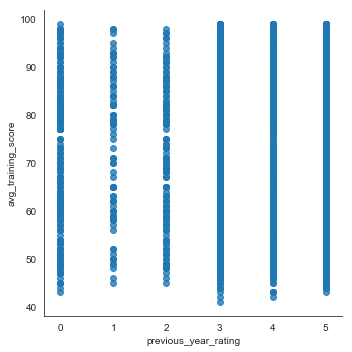

In [61]:
sns.lmplot(x='previous_year_rating', y='avg_training_score', data=train[train.is_promoted == 1], fit_reg=False)

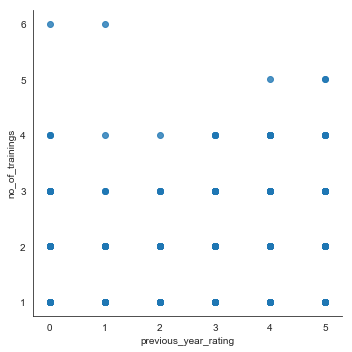

In [63]:
sns.lmplot(x='previous_year_rating', y='no_of_trainings', data=train[train.is_promoted == 1], fit_reg=False)

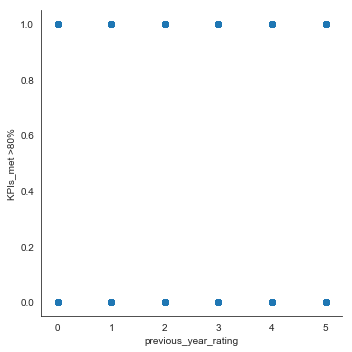

In [64]:
sns.lmplot(x='previous_year_rating', y='KPIs_met >80%', data=train[train.is_promoted == 1], fit_reg=False)

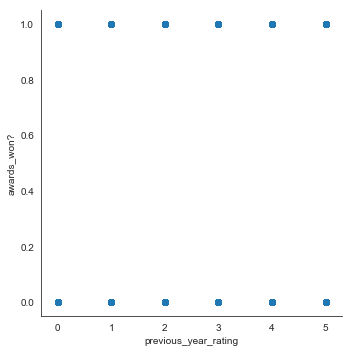

In [68]:
sns.lmplot(x='previous_year_rating', y='awards_won?', data=train[train.is_promoted == 1], fit_reg=False)

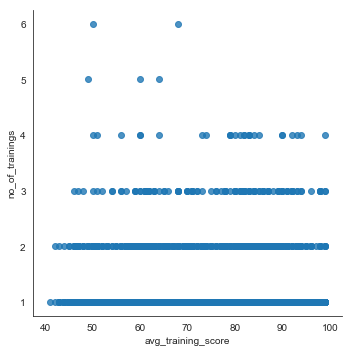

In [65]:
sns.lmplot(x='avg_training_score', y='no_of_trainings', data=train[train.is_promoted == 1], fit_reg=False)

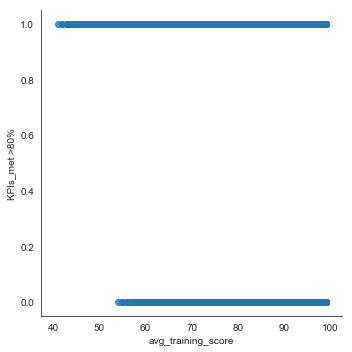

In [66]:
sns.lmplot(x='avg_training_score', y='KPIs_met >80%', data=train[train.is_promoted == 1], fit_reg=False)

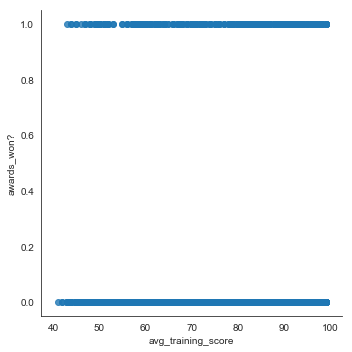

In [69]:
sns.lmplot(x='avg_training_score', y='awards_won?', data=train[train.is_promoted == 1], fit_reg=False)

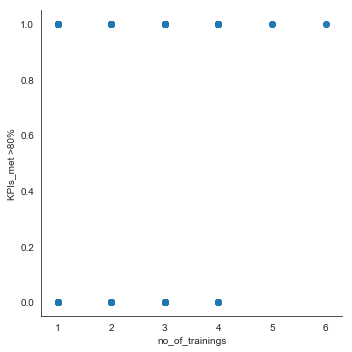

In [70]:
sns.lmplot(x='no_of_trainings', y='KPIs_met >80%', data=train[train.is_promoted == 1], fit_reg=False)

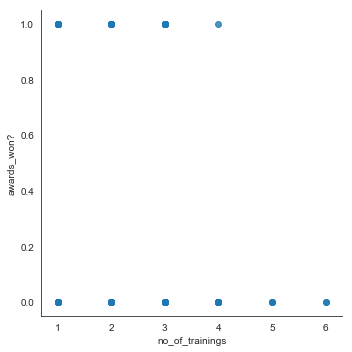

In [71]:
sns.lmplot(x='no_of_trainings', y='awards_won?', data=train[train.is_promoted == 1], fit_reg=False)

In all the above plots the only significant pattern so far is **no_of_training** vs. **avg_training_score**. I can call it the competent employees pattern. The employees trained less performs better at trainings. We can create a new indicator variable called competent employees -> those with less than 3 trainings and scores above 40<br>
Any sparse classes???

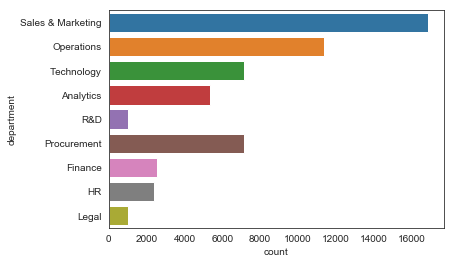

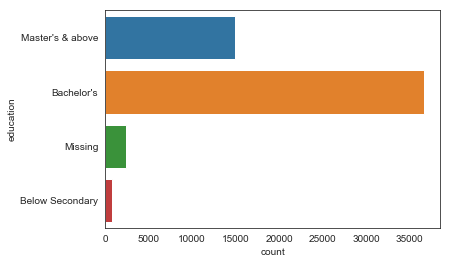

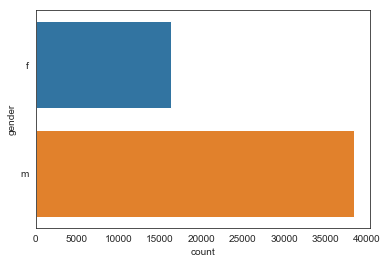

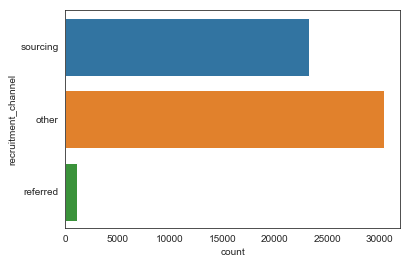

In [72]:
sns.countplot(y='department', data=train)
plt.show()
sns.countplot(y='education', data=train)
plt.show()
sns.countplot(y='gender', data=train)
plt.show()
sns.countplot(y='recruitment_channel', data=train)
plt.show()

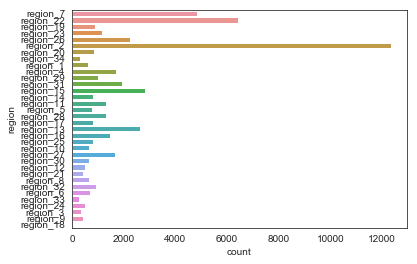

In [75]:
sns.countplot(y='region', data=train)
plt.show()

For Now, we leave the data as is and remove only the employee id column and then save the **analytical_base_table.csv**

In [76]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating_missing
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


Remove **employee_id** in both train and test datasets

In [77]:
train=train.drop('employee_id',axis=1) 
test=test.drop('employee_id',axis=1)

In [78]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_missing
0,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,1,0,77,1
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0


Next we create the dummy variables

In [79]:
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [80]:
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,previous_year_rating_missing,department_Analytics,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [81]:
test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_missing,department_Analytics,department_Finance,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,0.0,1,1,0,77,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [82]:
train.to_csv('train_analytical_base_table.csv', index=None)
test.to_csv('test_analytical_base_table.csv', index=None)

Next, we create a separate object for the target variable (y) and the input features (X)

In [83]:
y = train.is_promoted
X = train.drop('is_promoted',1) 

In [84]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [85]:
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_missing,department_Analytics,department_Finance,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [86]:
#Next we import train_test_split and split X and y appropriately into 
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size =0.2, random_state=1234)

The dataset has been divided into training and validation part. Let us import LogisticRegression from sklearn and fit the logistic regression model as a first test run and see what we get.

In [87]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression() 
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let’s predict promotion for validation set and calculate its f1_score.

In [89]:
pred_cv = model.predict(X_cv)

Let us calculate how accurate our predictions are by calculating the f1_score.

In [90]:
from sklearn.metrics import f1_score
f1_score(y_cv,pred_cv)

0.3701244813278008

Let’s make predictions for the test dataset.

In [102]:
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker.

In [94]:
submission=pd.read_csv("sample_submission_M0L0uXE.csv")

In [95]:
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


We only need the **employee_id** and the corresponding **is_promoted** feature for the final submission. we will fill these columns with the employee_id of test dataset and the predictions that we made, i.e., pred_test respectively.

In [103]:
pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [105]:
submission['is_promoted']=pred_test 
submission['employee_id']=test_original['employee_id']

In [106]:
submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


Finally we will convert the submission to .csv format and make submission to check our score on the leaderboard.

In [108]:
pd.DataFrame(submission, columns=['employee_id','is_promoted']).to_csv('ebot64_HR_logistic.csv', index=False)

The above csv file **'ebot64_HR_logistic.csv'** was submitted for ranking at https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/ on 05th APRIL, 2019 and got a ranking of 1152 out of 1381 submissions. Definitely, this ranking can be improved with other models and applying hyperparameters tuning. <br>
Let's spot check a number of models simultaneously as follows:

In [109]:
#Import algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

LR: 0.382992 (0.017643)


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn

LDA: 0.433178 (0.015339)
KNN: 0.234791 (0.022212)
CART: 0.429925 (0.020132)
NB: 0.214638 (0.014228)


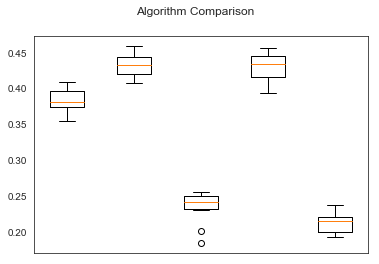

In [114]:
#Let's compare Algorithms

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.931671 (0.003291)


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn

LDA: 0.934006 (0.002703)
KNN: 0.921800 (0.003595)
CART: 0.897752 (0.003629)
NB: 0.525289 (0.048453)


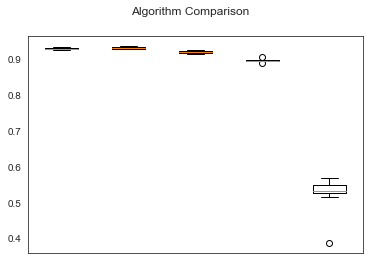

In [117]:
#Let's compare Algorithms

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.931671 (0.003291)


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn

LDA: 0.934006 (0.002703)
KNN: 0.921800 (0.003595)
CART: 0.897588 (0.003454)
NB: 0.525289 (0.048453)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

RF: 0.928934 (0.002689)
GB: 0.939626 (0.003082)


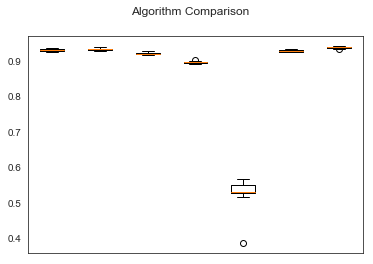

In [118]:
#Let's compare More Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_score'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.382992 (0.017643)


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn

LDA: 0.433178 (0.015339)
KNN: 0.234791 (0.022212)
CART: 0.430899 (0.020106)
NB: 0.214638 (0.014228)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

RF: 0.380128 (0.023689)
GB: 0.456805 (0.024496)


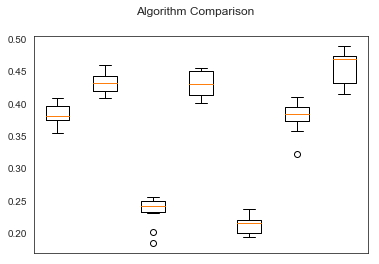

In [120]:
#Let's compare More Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

From the above, we see that there are other algorithms that have done better than **LogisticRegression**. Next, we are going to scale the dataset, apply hyperparameter tuning, package them all in a model pipeline and see what we can achieve in terms of improving the f1_score

In [121]:
#Start by importing required classes and functions
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [150]:
#Build model pipelines
pipelines = {
    'l1':make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2':make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [151]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('randomforestclassifier',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
               oob_score=False, random_state=123, verbose=0, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=

In [152]:
#Create the hyperparameters

l1_hyperparameters = {
    'logisticregression__C':np.linspace(1e-3, 1e3, 10)
}

l2_hyperparameters = {
    'logisticregression__C':np.linspace(1e-3, 1e3, 10)
}

rf_hyperparameters = {
    'randomforestclassifier__n_estimators':[100, 200],
    'randomforestclassifier__max_features':['auto', 'sqrt', 0.33]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators':[100, 200],
    'gradientboostingclassifier__max_depth':[1, 3, 5],
    'gradientboostingclassifier__learning_rate':[0.05, 0.1, 0.2]
}

In [153]:
#Create hyperparameters dictionary
hyperparameters = {
    'l1': l1_hyperparameters,
    'l2': l2_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [154]:
#Fit and tune the models with cross validation
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted') #, pipeline[name])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1 has been fitted


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2 has been fitted


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted


In [149]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.9316523135308714
l2 0.9316523135308714
rf 0.9385856079404467
gb 0.9420887461684425


#Using model.fit(X,y) instead of model.fit(X_train, y_train), we got the following model.best_score_<br>
* l1 0.9316523135308714
* l2 0.9316523135308714
* rf 0.9385856079404467
* gb 0.9420887461684425

In [155]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.9324453770013228
l2 0.9324453770013228
rf 0.9392190849792456
gb 0.9417962870045158


In [157]:
#Let's see the f1_score of each model in fitted_models
pred_cv = {}
for name, model in fitted_models.items():
    pred_cv = model.predict(X_cv)
    print(name, f1_score(y_cv,pred_cv))

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


l1 0.39158576051779936
l2 0.39158576051779936
rf 0.48134044173648133
gb 0.4953125


/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Let's make prediction for the test database, using the best of the four models i.e. gradientboostingclassifer, gb

In [158]:
pred_test_gb = fitted_models['gb'].predict(test)

/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Lets import the submission file again with which we'll submit to the solution checker.

In [159]:
submission_gb = pd.read_csv("sample_submission_M0L0uXE.csv")

In [160]:
submission_gb

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
5,46232,0
6,54542,0
7,67269,0
8,66174,0
9,76303,0


In [161]:
submission_gb['is_promoted']=pred_test_gb
submission_gb['employee_id']=test_original['employee_id']

In [162]:
pd.DataFrame(submission_gb, columns=['employee_id','is_promoted']).to_csv('ebot64_HR_gb.csv', index=False)

The above csv file 'ebot64_HR_gb.csv' was submitted for ranking at https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/ on 04th APRIL, 2019 and got a ranking of 538 out of 1382 submissions. 